# SEL635/SEL5724 - Visão Computacional Aplicada a Robótica



**Aluno:** Luiza Rodrigues Cardoso

**NUSP:** 14593332

Versão do documento: 1.4

 # Lista 1 - Projeção Perspectiva

Um dos propósitos deste exercício é verificar algumas propriedades do modelo de projeção perspectiva, e comparar com o modelo de projeção perspectiva fraca.

## Parte A: Projeção perspectiva

Considere uma câmera sem distorções radiais, com plano de projeção perpendicular ao seu eixo ótico ($\alpha=0$), distância focal $f$ em $[mm]$, dimensão horizontal e vertical de cada pixel, $s_x$ e $s_y$, dadas em $[mm/px]$, projeção do cento óptico na imagem na posição $(o_x,o_y)$ dada em $[px]$.

Considere também, conforme indicado na Figura 1, que a origem $(0,0)$ na imagem é o canto superior esquerdo, que o eixo $\hat x_{im}$ é o eixo horizontal, e que o eixo $\hat y_{im}$ é o eixo vertical. Também considere que o eixo da câmera $\hat X_c$ está alinhado com a horizontal do plano de projeção, e o eixo da câmera $\hat Y_c$ está alinhado com a vertical do plano de projeção, conforme também indicado na Figura 1.

Utilizando o modelo de projeção perspectiva, complete o código das funções `p_c = proj_perspectiva(Pc,f)` e `p_im = camera_to_image(pc, sx, sy, ox, oy)`.

Os parâmetros de entrada e saída das funções são:
*  `P_c` é uma matriz de tamanho $3 \times N$, onde cada coluna desta matriz representa a coordenada de um ponto no ambiente, dada em $[mm]$, descrita no sistema de coordenadas da câmera;
*   `p_c` é uma matriz de dimensão $3 \times N$, onde cada coluna representa um ponto no sistema de coordenadas da câmera, em $[mm]$ que corresponde a projeção perspectiva de um ponto do ambiente $P_c$ no plano da imagem;
*   `p_im` é uma matriz de dimensão $2 \times N$, em que cada coluna representa coordenada em $[px]$ na imagem correpondente ao ponto $p_c$ no sistema de coordenadas da câmera;
*   Os parâmetros intrínsecos da câmera são: `f`, `sx`, `sy`, `ox`, `oy`;


<div>
<img src="https://drive.google.com/uc?id=1GjlRR1Ng3KBpZLvHUN0w3pUFRDmoRFCL" width="500"/>
</div>
Figura 1 - Sistemas de coordenadas da câmera e da imagem





In [101]:
# Importar as bibliotecas que serão utilizadas
import numpy as np
import matplotlib.pyplot as plt


### A.1 Complete o código a seguir que realiza a projeção perspectiva

In [102]:
def proj_perspectiva(Pc,f):
  (M,N) = np.shape(Pc) # recupera o tamanho da matriz (N linhas, M colunas)
  if(M!=3):
    print('Aviso: a matriz Pc usada como entrada não possui três linhas!')

  pc = np.zeros((3,N))  # Inicializa o vetor pc de dimensão 3xN com zeros
  
  # Encontra a projeção perspectiva dos pontos no plano da imagem em [mm]:
  ######
  # Coloque aqui o seu código para calcular a matriz pc
  #Obtendo as coordenadas do sistema em relação ao mundo
  Xc = Pc[0,:]
  Yc = Pc[1,:]
  Zc = Pc[2,:]

  #aplicando o fator de correção q
  x = f*Xc/Zc
  y = f*Yc/Zc
      
  #matriz no sistema de coordenas da camera
  pc[0,:] = x
  pc[1,:] = y
  pc[2,:] = 1 #coordenada homogenea

  ######

  return pc


def camera_to_image(pc,sx,sy,ox,oy):
  (M,N) = np.shape(pc) # recupera o tamanho da matriz (N linhas, M colunas)
  if(M!=3):
    print('Aviso: a matriz pc usada como entrada não possui três linhas!')

  p_im = np.zeros((2,N))  # Inicializa o vetor p de dimensão 2xN com zeros

  # Converte as coordenadas dos pontos pc do sistema da câmera em [mm] para o sistema de coordenadas da imagem em [px]:
  #obtendo as coordenadas em relação ao sistema da camera
  x_im = pc[0,:]
  y_im = pc[1,:]
  
  #aplicando uma correção em relação à origem dos sistemas e passando da medida real(mm) para medidas discretas(pixel)
  x = ox - (x_im/sx)    
  y = oy - (y_im/sy)
      
  #matriz de coordenadas no sistema da imagem(x,y) em pixels
  p_im[0,:] = x
  p_im[1,:] = y
    
  
  ######

  return p_im


In [103]:
a = np.array([[50],[40],[200]])
x = proj_perspectiva(a, 20)
b = camera_to_image(a,0.1, 0.1, 320,240)


## Parte B: Aplicação da Projeção perspectiva

Considere que uma câmera posicionada conforme mostra a Figura 2. O eixo óptico da câmera $\hat Z_c$ é perpendicular à superficie do cubo cujos vértices da face superior são: $P_1$, $P_2$, $P_3$, e $P_4$. Os vértices da face inferior são: $P_5$, $P_6$, $P_7$ e $P_8$. O eixo óptico está posicionado a uma distância $d$ ao longo de $X_w$ a partir do centro da face do cubo.


<div>
<img src="https://drive.google.com/uc?id=1Gb3OEGGL8PG-LV-_9iLsId_s0i6byRuz" width="500"/>

</div>

Figura 2 - Câmera observando os vértices de um cubo

Considere um cubo com comprimento de aresta $2L$. As coordenadas dos vértices do cubo em relação à câmera são dadas em $[mm]$ por:

\begin{align}
&^cP_1 = [-L; -L-d; Z_c] \\
&^cP_2 = [L; -L-d; Z_c] \\
&^cP_3 = [L; +L-d; Z_c] \\
&^cP_4 = [-L; +L-d; Z_c] \\
&^cP_5 = [-L; -L-d; Z_c+2L] \\
&^cP_6 = [L; -L-d; Z_c+2L] \\
&^cP_7 = [L; +L-d; Z_c+2L] \\
&^cP_8 = [-L; +L-d; Z_c+2L]
\end{align}

Também considere que os parâmetros da câmera são: $f=8~mm$, $s_x=s_y=0.02~mm/px$, $o_x=1000~px$, $o_y=1000~px$.

A função `plot_imagem_cubo(Zc,d)` a seguir mostra a imagem dos vértices do cubo obtida pela câmera. A face superior do cubo é mostrada em azul, a face inferior é mostrada em vermelho, e os vértices laterais em magenta. Para valor de $L=1000$, $d =1500$ e $Z_c = 2000$, a função deve mostrar a seguinte mensagem:

```
Mostrando resultado para os parâmetros:
L= 1000  Zc= 2000  d= 1500  f= 8  sx= 0.02  sy= 0.02  ox= 1000  oy= 1000

Pc =
 [[-1000  1000  1000 -1000 -1000  1000  1000 -1000]
 [-2500 -2500  -500  -500 -2500 -2500  -500  -500]
 [ 2000  2000  2000  2000  4000  4000  4000  4000]]

p_im =
 [[1200.  800.  800. 1200. 1100.  900.  900. 1100.]
 [1500. 1500. 1100. 1100. 1250. 1250. 1050. 1050.]]
```



Mostrando resultado para os parâmetros:
L= 1000  Zc= 2000  d= 1500  f= 8  sx= 0.02  sy= 0.02  ox= 1000  oy= 1000 

Pc = 
 [[-1000  1000  1000 -1000 -1000  1000  1000 -1000]
 [-2500 -2500  -500  -500 -2500 -2500  -500  -500]
 [ 2000  2000  2000  2000  4000  4000  4000  4000]] 

p_im = 
 [[1200.  800.  800. 1200. 1100.  900.  900. 1100.]
 [1500. 1500. 1100. 1100. 1250. 1250. 1050. 1050.]] 



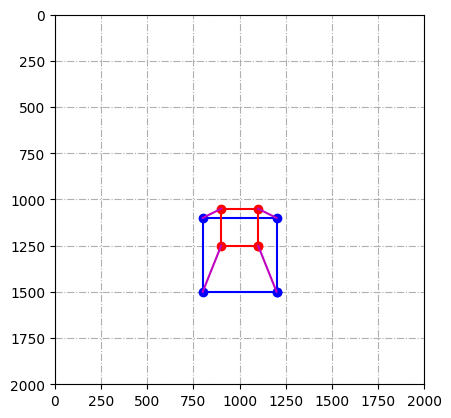

In [104]:
def plot_imagem_cubo(f,sx,sy,ox,oy,L,Zc,d):

  print('Mostrando resultado para os parâmetros:')
  print('L=',L,' Zc=',Zc,' d=',d,' f=',f,' sx=',sx,' sy=',sy,' ox=',ox,' oy=',oy,'\n')

  # Definindo cada ponto como um vetor unidimensional usando a biblioteca numpy
  P1 = np.array([-L, -L-d, Zc])
  P2 = np.array([L, -L-d, Zc])
  P3 = np.array([L, L-d, Zc])
  P4 = np.array([-L, L-d, Zc])
  P5 = np.array([-L, -L-d, Zc+2*L])
  P6 = np.array([L, -L-d, Zc+2*L])
  P7 = np.array([L, L-d, Zc+2*L])
  P8 = np.array([-L, L-d, Zc+2*L])

  Pc = np.column_stack((P1,P2,P3,P4,P5,P6,P7,P8))
  print('Pc = \n',Pc,'\n')

  # Observe que Pc são as coordenadas dos pontos 3D no sistema de coordenadas da câmera
  # Faz a projeção perspectiva fraca dos pontos 3D obtendo as coordenadas em pixel dos pontos na imagem
  pc = proj_perspectiva(Pc,f)
  p_im = camera_to_image(pc,sx,sy,ox,oy)
  print('p_im = \n',p_im,'\n')

  # Rearranjando os dados para uma matriz onde cada coluna é um dos pontos
  Pc_sup = np.column_stack((P1,P2,P3,P4,P1))  # P1 foi adicionado no final para que a última aresta possa ser plotada
  # print('P_sup = \n',Pc_sup,'\n')
  Pc_inf = np.column_stack((P5,P6,P7,P8,P5))  # P1 foi adicionado no final para que a última aresta possa ser plotada
  # print('P_inf = \n',Pc_inf,'\n')

  # Observe que Pc são as coordenadas dos pontos 3D no sistema de coordenadas da câmera
  # Faz a projeção perspectiva dos pontos 3D obtendo as coordenadas em px dos pontos na imagem
  pc_sup = proj_perspectiva(Pc_sup,f)
  pc_inf = proj_perspectiva(Pc_inf,f)
  p_im_sup = camera_to_image(pc_sup,sx,sy,ox,oy)
  # print('p_im_sup = \n',p_im_sup,'\n')
  p_im_inf = camera_to_image(pc_inf,sx,sy,ox,oy)
  # print('p_im_inf = \n',p_im_inf,'\n')

  # Faz o plot dos pontos
  plt.figure()  # Cria uma nova figura
  plt.plot(p_im_sup[0],p_im_sup[1],'bo-') # Plota a face superior em azul
  plt.axis([0, 2*ox, 0, 2*oy]) # Define os limites da imagem considerando ox e oy no centro
  plt.gca().invert_yaxis() # inverte o eixo y para que a origem fique no canto superior esquerdo
  plt.gca().grid(True, linestyle='-.') # mostra grid
  plt.gca().set_aspect('equal') # mostra eixo x e y com a mesma relação de aspecto

  # Desenha a face inferior
  plt.plot(p_im_inf[0],p_im_inf[1],'ro-')  # Plota a face inferior em vermelho

  # Desenha as arestas laterais
  plt.plot([p_im_sup[0][0], p_im_inf[0][0]],[p_im_sup[1][0], p_im_inf[1][0]],'m-')
  plt.plot([p_im_sup[0][1], p_im_inf[0][1]],[p_im_sup[1][1], p_im_inf[1][1]],'m-')
  plt.plot([p_im_sup[0][2], p_im_inf[0][2]],[p_im_sup[1][2], p_im_inf[1][2]],'m-')
  plt.plot([p_im_sup[0][3], p_im_inf[0][3]],[p_im_sup[1][3], p_im_inf[1][3]],'m-')

  return p_im

# Executar a função com os parâmetros desejados
p_im = plot_imagem_cubo(f=8,sx=0.02,sy=0.02,ox=1000,oy=1000,L=1000, Zc = 2000,d = 1500)

### B.1 Quais propriedades da projeção perspectiva é possível observar no exemplo acima?

**Resposta**:

A projeção perspectiva é uma Transformação Não-linear, ou seja, não preserva as propriedades iniciais, como distancia entre pontos, porém uma linha ainda é uma linha nesta. Assim, algumas das propriedades que observei nesta projeção do cubo foram:

* proporção não é preservado, visto que há uma discrepância entre os tamanhos da face superior e inferior;
* convergencia de retas em um ponto de fuga;
* retas no mundo -> retas na imagem;

## Parte C: Perspectiva Fraca

O modelo de projeção perspectiva fraca considera que todos os pontos observados estão em um mesmo plano, perpendicular ao plano de projeção, e a uma distância $\overline Z$ da câmera. Sendo que $\overline Z$ é a média das coordenadas $^cZ$ dos pontos observados no ambiente em relação ao sistema de coordenada da câmera.

O modelo de projeção perspectiva fraca pode ser entendido como sendo uma projeção ortográfica seguida de um escalonamento isotrópico. Na projeção ortográfica, os pontos são projetados no plano de projeção através de retas paralelas ao eixo óptico. Em seguida, o escalonamento isotrópico aplica um fator de escala em todos os pontos considerando a distância focal e o $\overline Z$.




## C.1: Implemente a projeção perspectiva fraca

Implemente a função `pc = proj_perspectiva_fraca(Pc,f)` que aplica o modelo de projeção perspectiva fraca para encontrar as coordenadas no sistema da câmera em [mm] dos pontos no ambiente projetados no plano da imagem. Teste para o mesmo caso testado na parte B. Para valor de $L=1000$, $d =1500$ e $Z_c = 2000$, a mensagem retornada pela função é:

```
Mostrando resultado para os parâmetros:
L= 1000  Zc= 2000  d= 1500  f= 8  sx= 0.02  sy= 0.02  ox= 1000  oy= 1000

Pc =
 [[-1000  1000  1000 -1000 -1000  1000  1000 -1000]
 [-2500 -2500  -500  -500 -2500 -2500  -500  -500]
 [ 2000  2000  2000  2000  4000  4000  4000  4000]]

p_im =
 [[1133.33333333  866.66666667  866.66666667 1133.33333333 1133.33333333
   866.66666667  866.66666667 1133.33333333]
 [1333.33333333 1333.33333333 1066.66666667 1066.66666667 1333.33333333
  1333.33333333 1066.66666667 1066.66666667]]
```


In [105]:
def proj_perspectiva_fraca(Pc,f):
  (M,N) = np.shape(Pc) # recupera o tamanho da matriz (N linhas, M colunas)
  if(M!=3):
    print('Aviso: a matriz Pc usada como entrada não possui três linhas!')

  pc = np.zeros((3,N))  # Inicializa o vetor p de dimensão 2xN com zeros

  # Encontra a projeção perspectiva fraca p dos pontos P no plano da imagem em [mm]:
  ######################################################################
  ##### Implemente seu código aqui
  #projeção ortografica
  Xc = Pc[0,:]
  Yc = Pc[1,:]

  #calculo da profundidade média
  Z_med = np.mean(Pc[2,:])

  #aplicando o escalonamento isotrópico
  x = Xc* f/Z_med
  y = Yc*f/Z_med
      
  #matriz com as coordenadas no sistema da camera
  pc[0,:] = x
  pc[1,:] = y
  pc[2,:] = 1 #coordenada homogenea


  ######################################################################

  return pc

Mostrando resultado para os parâmetros:
L= 1000  Zc= 2000  d= 1500  f= 8  sx= 0.02  sy= 0.02  ox= 1000  oy= 1000 

Pc = 
 [[-1000  1000  1000 -1000 -1000  1000  1000 -1000]
 [-2500 -2500  -500  -500 -2500 -2500  -500  -500]
 [ 2000  2000  2000  2000  4000  4000  4000  4000]] 

p_im = 
 [[1133.33333333  866.66666667  866.66666667 1133.33333333 1133.33333333
   866.66666667  866.66666667 1133.33333333]
 [1333.33333333 1333.33333333 1066.66666667 1066.66666667 1333.33333333
  1333.33333333 1066.66666667 1066.66666667]] 



(2, 8)

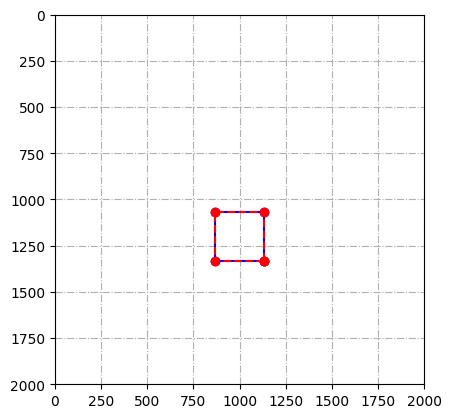

In [106]:
def plot_imagem_cubo_fraca(f,sx,sy,ox,oy,L,Zc,d):

  print('Mostrando resultado para os parâmetros:')
  print('L=',L,' Zc=',Zc,' d=',d,' f=',f,' sx=',sx,' sy=',sy,' ox=',ox,' oy=',oy,'\n')

  # Definindo cada ponto como um vetor unidimensional usando a biblioteca numpy
  P1 = np.array([-L, -L-d, Zc])
  P2 = np.array([L, -L-d, Zc])
  P3 = np.array([L, L-d, Zc])
  P4 = np.array([-L, L-d, Zc])
  P5 = np.array([-L, -L-d, Zc+2*L])
  P6 = np.array([L, -L-d, Zc+2*L])
  P7 = np.array([L, L-d, Zc+2*L])
  P8 = np.array([-L, L-d, Zc+2*L])

  # Rearranjando os dados para uma matriz onde cada coluna é um dos pontos.
  # Para que o modelo de perspectiva fraca calcule a média da coordenada Z,
  # todos os pontos devem ser passados de uma vez.
  Pc = np.column_stack((P1,P2,P3,P4,P5,P6,P7,P8))
  print('Pc = \n',Pc,'\n')

  # Observe que Pc são as coordenadas dos pontos 3D no sistema de coordenadas da câmera
  # Faz a projeção perspectiva fraca dos pontos 3D obtendo as coordenadas em pixel dos pontos na imagem
  pc = proj_perspectiva_fraca(Pc,f)
  p_im_pp = camera_to_image(pc,sx,sy,ox,oy)
  print('p_im = \n',p_im_pp,'\n')

  # Faz o plot dos pontos
  plt.figure()  # Cria uma nova figura
  p_im_sup = np.column_stack((p_im_pp[:,0:4],p_im_pp[:,0].reshape(-1,1))) # Monta a sequencia de pontos (p1, p2, p3, p4, p1)
  #print('p_im_sup = \n',p_im_sup,'\n')
  p_im_inf = np.column_stack((p_im_pp[:,4:],p_im_pp[:,4].reshape(-1,1))) # Monta a sequencia de pontos (p5, p6, p7, p8, p5)
  #print('p_im_inf = \n',p_im_inf,'\n')
  plt.plot(p_im_sup[0],p_im_sup[1],'bo-') # Plota a face superior em azul
  plt.axis([0, 2*ox, 0, 2*oy]) # Define os limites da imagem considerando ox e oy no centro
  plt.gca().invert_yaxis() # inverte o eixo y para que a origem fique no canto superior esquerdo
  plt.gca().grid(True, linestyle='-.') # mostra grid
  plt.gca().set_aspect('equal') # mostra eixo x e y com a mesma relação de aspecto

  # Desenha a face inferior
  plt.plot(p_im_inf[0],p_im_inf[1],'ro--')  # Plota a face inferior em vermelho

  # Desenha as arestas laterais
  plt.plot([p_im_sup[0][0], p_im_inf[0][0]],[p_im_sup[1][0], p_im_inf[1][0]],'m-')
  plt.plot([p_im_sup[0][1], p_im_inf[0][1]],[p_im_sup[1][1], p_im_inf[1][1]],'m-')
  plt.plot([p_im_sup[0][2], p_im_inf[0][2]],[p_im_sup[1][2], p_im_inf[1][2]],'m-')
  plt.plot([p_im_sup[0][3], p_im_inf[0][3]],[p_im_sup[1][3], p_im_inf[1][3]],'m-')
  return p_im_pp
# Executar a função com os parâmetros desejados
p_im_pp = plot_imagem_cubo_fraca(f=8,sx=0.02,sy=0.02,ox=1000,oy=1000,L=1000, Zc = 2000,d = 1500)
p_im_pp.shape


### C.2 Para o caso do teste anterior ($Z_c = 2000$) a projeção perspectiva fraca pode ser considerada uma boa aproximação da projeção perspectiva? Por que? Qual o erro entre as projeções?

**Resposta:**

Justifique a resposta com base na diferença entre as coordenadas dos pontos na imagem obtida através dos dois tipos de projeção. Calcule e faça o print do erro entre as projeções no trecho de código a seguir.

É possível observar que no primeiro método, Projeção Persctiva, há uma profundidade na imagem, o que não ocorre no segundo, pois usou-se a profundidade média e aplico-se uma transoformação ortográfica. O que diferencia ambas, é que no primeiro método temos um ponto de fuga e profundidade entre os pontos, similar a visão humana.

Matriz diferença: 
 [[ 66.66666667  66.66666667  66.66666667  66.66666667  33.33333333
   33.33333333  33.33333333  33.33333333]
 [166.66666667 166.66666667  33.33333333  33.33333333  83.33333333
   83.33333333  16.66666667  16.66666667]]


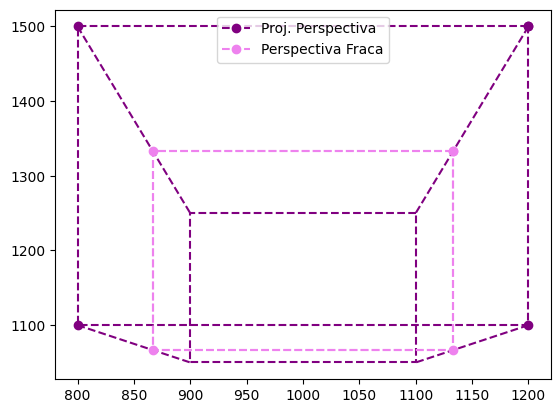

In [107]:
########################################
# Adicione um código aqui que calcula e mostra o print do valor da diferença entre
# a projeção perspectiva e a projeção perspectiva fraca para Zc = 2000

#calcula a diferença entre as duas perspectivas
diff = abs(p_im - p_im_pp)
print("Matriz diferença: \n", diff)

# Cria uma nova figura
#projecao perspectiva
p_im_sup = np.column_stack((p_im[:,0:4],p_im[:,0].reshape(-1,1))) # Monta a sequencia de pontos (p1, p2, p3, p4, p1)
p_im_inf = np.column_stack((p_im[:,4:],p_im[:,4].reshape(-1,1))) # Monta a sequencia de pontos (p5, p6, p7, p8, p5)

#perspectiva fraca
p_im_pp_sup = np.column_stack((p_im_pp[:,0:4],p_im_pp[:,0].reshape(-1,1))) # Monta a sequencia de pontos (p1, p2, p3, p4, p1)
p_im_pp_inf = np.column_stack((p_im_pp[:,4:],p_im_pp[:,4].reshape(-1,1))) # Monta a sequencia de pontos (p5, p6, p7, p8, p5)

#plot projecao perspectiva 
plt.plot(p_im_sup[0], p_im_sup[1],  'o--',color='purple', label='Proj. Perspectiva')
plt.plot(p_im_inf[0], p_im_inf[1], '--', color='purple') 

for i in range(4):
    plt.plot([p_im_sup[0][i], p_im_inf[0][i]], [p_im_sup[1][i], p_im_inf[1][i]], '--',color='purple')

#plot perspectiva fraca
plt.plot(p_im_pp_sup[0], p_im_pp_sup[1], 'o--',color='violet', label='Perspectiva Fraca') # alpha para transparência
plt.plot(p_im_pp_inf[0], p_im_pp_inf[1], '--', color='violet')
for i in range(4):
    plt.plot([p_im_pp_sup[0][i], p_im_pp_inf[0][i]], [p_im_pp_sup[1][i], p_im_pp_inf[1][i]], 'r--')

plt.legend()
plt.show()
#######################################

### C.3 Considere agora as seguintes condições para o problema: $f=120~mm$, $s_x=s_y=0.01~mm/px$, $o_x=1000~px$, $o_y=1000~px$, $L=1000$, $d =1500$ e $Z_c = 40000$. Para essas condições, a projeção perspectiva fraca pode ser considerada uma boa aproximação da projeção perspectiva? Por que? Qual o erro entre as projeções?

**Resposta:**


Justifique com base na diferença entre as coordenadas dos pontos na imagem obtida através dos dois tipos de projeção. Calcule e faça o print do erro entre as projeções no trecho de código a seguir.

Mostrando resultado para os parâmetros:
L= 1000  Zc= 40000  d= 1500  f= 120  sx= 0.02  sy= 0.02  ox= 1000  oy= 1000 

Pc = 
 [[-1000  1000  1000 -1000 -1000  1000  1000 -1000]
 [-2500 -2500  -500  -500 -2500 -2500  -500  -500]
 [40000 40000 40000 40000 42000 42000 42000 42000]] 

p_im = 
 [[1150.          850.          850.         1150.         1142.85714286
   857.14285714  857.14285714 1142.85714286]
 [1375.         1375.         1075.         1075.         1357.14285714
  1357.14285714 1071.42857143 1071.42857143]] 

Mostrando resultado para os parâmetros:
L= 1000  Zc= 40000  d= 1500  f= 120  sx= 0.02  sy= 0.02  ox= 1000  oy= 1000 

Pc = 
 [[-1000  1000  1000 -1000 -1000  1000  1000 -1000]
 [-2500 -2500  -500  -500 -2500 -2500  -500  -500]
 [40000 40000 40000 40000 42000 42000 42000 42000]] 

p_im = 
 [[1146.34146341  853.65853659  853.65853659 1146.34146341 1146.34146341
   853.65853659  853.65853659 1146.34146341]
 [1365.85365854 1365.85365854 1073.17073171 1073.17073171 1365.853

array([[1146.34146341,  853.65853659,  853.65853659, 1146.34146341,
        1146.34146341,  853.65853659,  853.65853659, 1146.34146341],
       [1365.85365854, 1365.85365854, 1073.17073171, 1073.17073171,
        1365.85365854, 1365.85365854, 1073.17073171, 1073.17073171]])

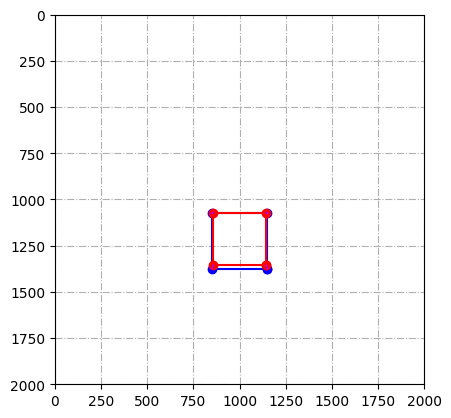

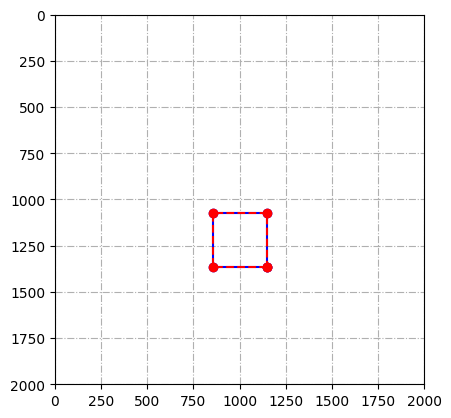

In [108]:
########################################
# Adicione seu código aqui para verificar os resultados
plot_imagem_cubo(f=120,sx=0.02,sy=0.02,ox=1000,oy=1000,L=1000, Zc = 40000,d = 1500)
plot_imagem_cubo_fraca(f=120,sx=0.02,sy=0.02,ox=1000,oy=1000,L=1000, Zc = 40000,d = 1500)


########################################
# Adicione um código aqui que calcula e mostra o print do valor da diferença entre
# a projeção perspectiva e a projeção perspectiva fraca para Zc = 40000




### C.4 Considerado $L=1000$, e $d=1500$, qual a faixa de valores de $Z_c$ para o qual a projeção perspectiva fraca se aproxima da projeção perspectiva?

**Resposta:**  

Mostre como chegou nesse resultado utilizando o trecho de código a seguir:

In [109]:
########################################
# Utilize esse campo de código para calcular o resultado da C.3



# Pontuação



*   A.1: 4.0 pontos [2.0 pontos para cada uma das funções implementadas]
*   B.1: 1.0 pontos
*   C.1: 2.0 pontos
*   C.2: 1.0 pontos
*   C.3: 1.0 pontos
*   C.4: 1.0 pontos

